# Estimating Canopy Cover from Images

The demonstration [Demonstration Canopy Cover Calculation](./crude_canopy_cover.ipynb)
assumes that the sky and canopy have already been distinguished.
We need to do this for a real image
by converting it to gray scale then using 
Otsu's method <https://en.wikipedia.org/wiki/Otsu%27s_method> in `skimage`
to determine the threshold between sky and canopy.


1. Get the image with `imageio`.
2. Convert to grey scale with `skimage`.
3. Don't blur the image because we aren't trying to detect edges or features.
3. Take a look at the histogram and guess the threshold.

## Get the image

Using `imageio.v3.imread` because I hear tell that the `io.imread` in `skimage`
can alter the image when it is read.
Besides the `imageio.v3.imread` has more options.

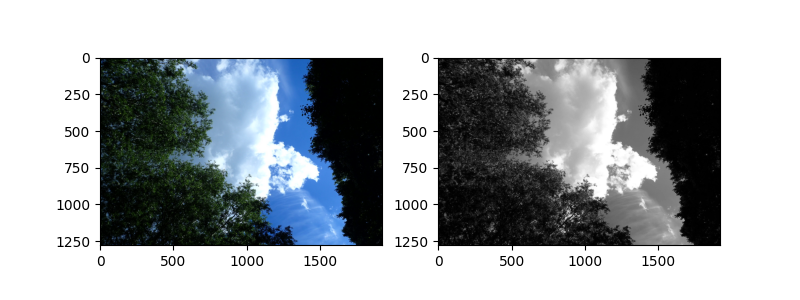

In [1]:
"""Get an image."""
%matplotlib widget

import imageio.v3 as iio
import numpy
import skimage
from matplotlib import pyplot
from skimage import draw

CANOPY_IMAGE = iio.imread(
    uri="../../data/raw/2019-06/P6200003.JPG"
)
CANOPY_IMAGE_IN_GRAYSCALE = skimage.color.rgb2gray(CANOPY_IMAGE)

fig, axes = pyplot.subplots(1, 2, figsize=(8, 3))  # Adjust DPI if needed
axes[0].imshow(CANOPY_IMAGE)
axes[0].axis('on')

axes[1].imshow(CANOPY_IMAGE_IN_GRAYSCALE, cmap=pyplot.cm.gray)
axes[1].axis('on')

pyplot.show()

## Luminance Distribution

Just for reassurance,
look at the distribution of the luminance in the image.
Then determine the threshold between light and dark
using Otsu's method <https://en.wikipedia.org/wiki/Otsu%27s_method>.

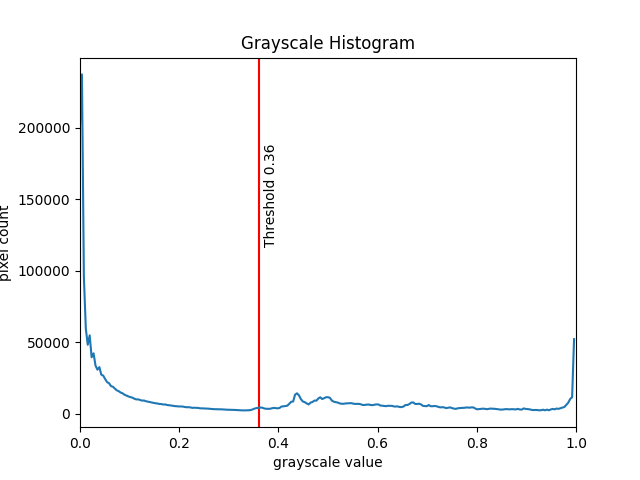

In [11]:
"""Look at the histogram."""

histogram, bin_edges = numpy.histogram(
    CANOPY_IMAGE_IN_GRAYSCALE, bins=256, range=(0, 1)
)
CALCULATED_THRESHOLD = skimage.filters.threshold_otsu(CANOPY_IMAGE_IN_GRAYSCALE)
CALCULATED_THRESHOLD = round(CALCULATED_THRESHOLD, 2)

figure, axes = pyplot.subplots()
axes.set_title("Grayscale Histogram")
axes.set_xlabel("grayscale value")
axes.set_ylabel("pixel count")
axes.set_xlim([0.0, 1.0])
axes.axvline(
    x=CALCULATED_THRESHOLD,
    color="red",
)
axes.text(
    CALCULATED_THRESHOLD + 0.01,
    max(histogram) / 2,
    f"Threshold {CALCULATED_THRESHOLD}",
    rotation=90,
)
axes.plot(bin_edges[:-1], histogram)

## Distinguish Sky and Canopy

Using the `CALCULATED_THRESHOLD` value we can separate the sky and canopy.

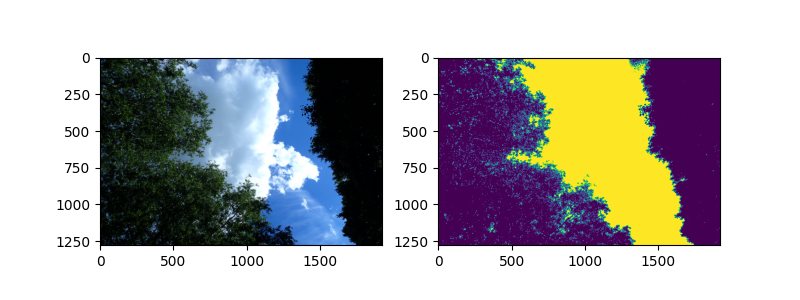

In [3]:
"""Create the binary mask"""
CANOPY_IMAGE_IN_BLACK_AND_WHITE = CANOPY_IMAGE_IN_GRAYSCALE > CALCULATED_THRESHOLD


fig, axes = pyplot.subplots(1, 2, figsize=(8, 3))  # Adjust DPI if needed
axes[0].imshow(CANOPY_IMAGE)
axes[0].axis('on')

axes[1].imshow(CANOPY_IMAGE_IN_BLACK_AND_WHITE)
axes[1].axis('on')

pyplot.show()